In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os

#Display the names and number of class labels from the dataset folder:

#List all the folder names(class labels) inside the dataset folder
dataset_path = os.listdir('/content/drive/MyDrive/Group_2_ML2_Fruit_Quality_Classification/dataset')

#Display the class labels names
print(dataset_path)

#Display the number of class labels
print('Types of class labels found: ', len(dataset_path))

['rottenbanana', 'freshoranges', 'rottenapples', 'freshapples', 'rottenoranges', 'freshbanana']
Types of class labels found:  6


In [ ]:
#Put all the images into a single list for easier working

class_labels = [] #list to hold all the image file names
count = 0
#Loop through all class folders inside the dataset
for item in dataset_path:
  #Get all the file names inside each class folder
  all_classes = os.listdir('/content/drive/MyDrive/Group_2_ML2_Fruit_Quality_Classification/dataset' + '/' + item)

  #Add them to the list
  for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' + item) + '/' + room))
    print(class_labels[-1]) #Display all file names(which are appended inside a single list)
    count +=1
    if count ==300:
      count = 0
      break


('rottenbanana', 'dataset_path/rottenbanana/rotated_by_60_Screen Shot 2018-06-12 at 9.26.13 PM.png')
('rottenbanana', 'dataset_path/rottenbanana/rotated_by_60_Screen Shot 2018-06-12 at 9.25.28 PM.png')
('rottenbanana', 'dataset_path/rottenbanana/rotated_by_60_Screen Shot 2018-06-12 at 9.26.01 PM.png')
('rottenbanana', 'dataset_path/rottenbanana/rotated_by_60_Screen Shot 2018-06-12 at 9.23.24 PM.png')
('rottenbanana', 'dataset_path/rottenbanana/rotated_by_75_Screen Shot 2018-06-12 at 8.48.46 PM.png')
('rottenbanana', 'dataset_path/rottenbanana/rotated_by_60_Screen Shot 2018-06-12 at 9.26.27 PM.png')
('rottenbanana', 'dataset_path/rottenbanana/rotated_by_75_Screen Shot 2018-06-12 at 8.49.04 PM.png')
('rottenbanana', 'dataset_path/rottenbanana/rotated_by_60_Screen Shot 2018-06-12 at 9.27.35 PM.png')
('rottenbanana', 'dataset_path/rottenbanana/rotated_by_75_Screen Shot 2018-06-12 at 8.49.30 PM.png')
('rottenbanana', 'dataset_path/rottenbanana/rotated_by_75_Screen Shot 2018-06-12 at 8.49.25

In [ ]:
#Build a dataframe which consist of 2 columns: the image file names and their corresponding class label
df = pd.DataFrame(data=class_labels, columns=['Labels', 'File'])
print(df.head())
print(df.tail())

         Labels                                               File
0  rottenbanana  dataset_path/rottenbanana/rotated_by_60_Screen...
1  rottenbanana  dataset_path/rottenbanana/rotated_by_60_Screen...
2  rottenbanana  dataset_path/rottenbanana/rotated_by_60_Screen...
3  rottenbanana  dataset_path/rottenbanana/rotated_by_60_Screen...
4  rottenbanana  dataset_path/rottenbanana/rotated_by_75_Screen...
           Labels                                               File
1795  freshbanana  dataset_path/freshbanana/rotated_by_60_Screen ...
1796  freshbanana  dataset_path/freshbanana/rotated_by_60_Screen ...
1797  freshbanana  dataset_path/freshbanana/rotated_by_60_Screen ...
1798  freshbanana  dataset_path/freshbanana/rotated_by_60_Screen ...
1799  freshbanana  dataset_path/freshbanana/rotated_by_60_Screen ...


In [ ]:
#Display the number of samples for each label

#Total number of samples inside the dataset
print("Total number of images in the dataset: ", len(df))

#Number of samples in each class label(count directly from the dataframe we just built)
label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  1800
Labels
rottenbanana     300
freshoranges     300
rottenapples     300
freshapples      300
rottenoranges    300
freshbanana      300
Name: count, dtype: int64


In [ ]:
#Resize the images to 256x256
import cv2
path = '/content/drive/MyDrive/Group_2_ML2_Fruit_Quality_Classification/dataset/'
dataset_path = os.listdir('/content/drive/MyDrive/Group_2_ML2_Fruit_Quality_Classification/dataset')
im_size = 256

images = [] #list to hold resized image data
labels = [] #list to hold the corresponding class label(folder name) for each image

for i in dataset_path:
  #construct the full path for the current folder
  data_path = path + str(i)
  #list to hold name of files inside the folder
  filenames = [i for i in os.listdir(data_path)][:300]

  for f in filenames:
    #read the image file from disk
    img = cv2.imread(data_path + '/' + f)
    #resize the image to 256x256
    # Check if the image was loaded successfully
    if img is not None:
      #resize the image to 256x256
      img = cv2.resize(img, (im_size, im_size))
      images.append(img)
      labels.append(i)
    else:
      print(f"Failed to load image: {data_path + '/' + f}")

#convert the list of images into a numpy array
images = np.array(images)

#Normalize the pixel values:
#   astype('float 32'): Converts all pixel values from integers (0–255) to 32-bit floating-point numbers.
#   /255: Normalizes pixel values from the range [0, 255] to the range [0.0, 1.0].
images = images.astype('float32')/255
#Return the shape of the array:
#   13599 images, each image is 256 by 256 pixels
#   3 color channels(RGB)
images.shape


(1800, 256, 256, 3)

In [ ]:
#Encode categorical labels into numeric form
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Display all the class labels of each sample in the dataset(which is still in the categorical form)
y = df['Labels'].values
print(y)
print(np.unique(y))

#Encode to numeric form
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
print(y)

# Assuming y is the encoded labels
import numpy as np
print(np.unique(y))

['rottenbanana' 'rottenbanana' 'rottenbanana' ... 'freshbanana'
 'freshbanana' 'freshbanana']
['freshapples' 'freshbanana' 'freshoranges' 'rottenapples' 'rottenbanana'
 'rottenoranges']
[4 4 4 ... 1 1 1]
[0 1 2 3 4 5]


In [ ]:
#One hot encoding
y = y.reshape(-1, 1)

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
Y = onehotencoder.fit_transform(y).toarray()
print(Y)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [ ]:
#Shuffle & split the dataset into training set & validation test & testing set
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# First split into train + validation and test
images, Y = shuffle(images, Y, random_state=1)
X_train_val, X_test, y_train_val, y_test = train_test_split(images, Y, test_size=0.1, random_state=1)

# Then split train + validation into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(1296, 256, 256, 3)
(1296, 6)
(324, 256, 256, 3)
(324, 6)
(180, 256, 256, 3)
(180, 6)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, Rescaling # import Rescaling directly
from tensorflow.keras.callbacks import TensorBoard

model = Sequential()

model.add(Conv2D(32, (3, 3), activation = "relu", input_shape=(256,256,3)))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (2, 2), activation = "relu"))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(6, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

tensorboard_callback = TensorBoard(log_dir='./logs')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,545,286 (112.71 MB)

 Trainable params: 29,545,286 (112.71 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val,y_val),callbacks=tensorboard_callback)

Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 309ms/step - accuracy: 0.2773 - loss: 7.0639 - val_accuracy: 0.5895 - val_loss: 1.2338
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.6510 - loss: 0.8873 - val_accuracy: 0.7716 - val_loss: 0.8954
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.7663 - loss: 0.6457 - val_accuracy: 0.8086 - val_loss: 0.6868
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.8193 - loss: 0.5335 - val_accuracy: 0.8611 - val_loss: 0.5026
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.8635 - loss: 0.3914 - val_accuracy: 0.8426 - val_loss: 0.5203
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.8628 - loss: 0.3803 - val_accuracy: 0.8765 - val_loss: 0.4055
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.8964 - loss: 0.2835 - val_accuracy: 0.8488 - val_loss: 0.4259
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.9153 - loss: 0.2302 - val_accuracy: 0.8611 -

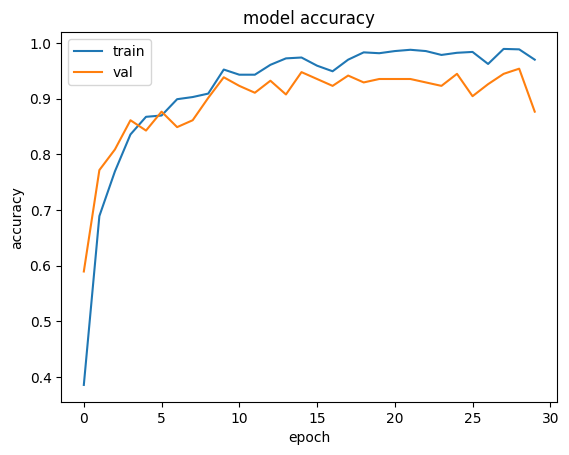

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.plot(history.history["accuracy"])
  plt.plot(history.history["val_accuracy"])
  plt.title("model accuracy")
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(["train", "val"], loc="upper left")
  plt.show()

plot_history(history)

<function matplotlib.pyplot.show(close=None, block=None)>

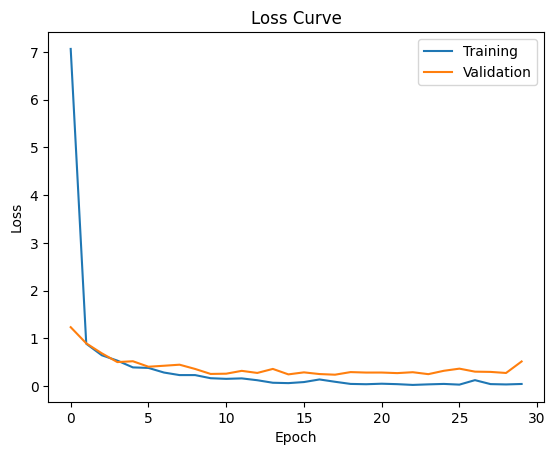

In [ ]:
import matplotlib.pyplot as plt

train_loss = [7.0639, 0.8873, 0.6457, 0.5335, 0.3914, 0.3803, 0.2835, 0.2302, 0.2303, 0.1646, 0.1515, 0.1611, 0.1226, 0.0697, 0.0619, 0.0840, 0.1388, 0.0902, 0.0452, 0.0388, 0.0495, 0.0402, 0.0242, 0.0359, 0.0452, 0.0305, 0.1243, 0.0414, 0.0343, 0.0441]
val_loss   = [1.2338, 0.8954, 0.6868, 0.5026, 0.5203, 0.4055, 0.4259, 0.4481, 0.3589, 0.2544, 0.2595, 0.3190, 0.2753, 0.3595, 0.2451, 0.2874, 0.2519, 0.2385, 0.2929, 0.2831, 0.2836, 0.2716, 0.2904, 0.2498, 0.3204, 0.3652, 0.3023, 0.2970, 0.2744, 0.5156]

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training", "Validation"])
plt.title("Loss Curve")
plt.show

In [ ]:
# model evaluaion
results = model.evaluate(X_test,y_test, verbose=0)
y_pred = model.predict(X_test)
print("Test loss: {:.5f}".format(results[0]))
print("Test accuracy: {:.2f}%".format(results[1] * 100))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Test loss: 0.38062
Test accuracy: 90.56%


In [ ]:
from sklearn.metrics import confusion_matrix

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

confusion_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print(confusion_matrix)

[[30  0  0  2  0  0]
 [ 0 32  0  0  1  0]
 [ 0  1 36  0  0  2]
 [ 3  0  0 22  1  0]
 [ 0  1  0  0 18  0]
 [ 1  1  3  1  0 25]]


In [ ]:
y_true = []
y_pred = []

for actual_class in range(6):  # we have 6 classes
    for predicted_class in range(6):
        count = confusion_matrix[actual_class][predicted_class]
        y_true.extend([actual_class] * count)
        y_pred.extend([predicted_class] * count)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.91      0.97      0.94        33
           2       0.92      0.92      0.92        39
           3       0.88      0.85      0.86        26
           4       0.90      0.95      0.92        19
           5       0.93      0.81      0.86        31

    accuracy                           0.91       180
   macro avg       0.90      0.91      0.90       180
weighted avg       0.91      0.91      0.90       180



In [ ]:
#Save model
model.save('/content/drive/MyDrive/Group_2_ML2_Fruit_Quality_Classification/fruit.keras')

In [2]:
#Load model to use
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Group_2_ML2_Fruit_Quality_Classification/fruit.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Predicted class: Fresh_Banana
Confidence: 99.99095%


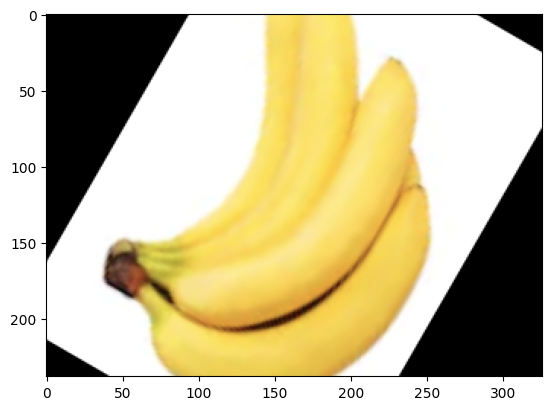

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Demo test
test_image = cv2.imread("/content/drive/MyDrive/Group_2_ML2_Fruit_Quality_Classification/dataset/freshbanana/Copy of rotated_by_60_Screen Shot 2018-06-12 at 9.40.38 PM.png")

plot_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

test_image = cv2.resize((test_image),(256,256))
test_image = np.array(test_image)
test_image = test_image.astype('float32')/255

preds = model.predict(test_image.reshape(1,256,256,3))
class_labels = ['Fresh_Apple', 'Fresh_Banana', 'Fresh_Orange', 'Rotten_Apple', 'Rotten_Banana', 'Rotten_Orange']
pred_class = np.argmax(preds) #Get the class that has the highest probability

confidence = preds[0][pred_class] * 100

if confidence > 50:
  print(f"Predicted class: {class_labels[pred_class]}")
  print(f"Confidence: {confidence:.5f}%")
else:
  print("Apples, bananas and oranges are not found.")

plt.imshow(plot_image)
plt.show()